Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed


Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for GOOGL...
Fetching data for AMZN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TSLA...
Preprocessing data for AAPL...
Preprocessing data for MSFT...
Preprocessing data for GOOGL...
Preprocessing data for AMZN...
Preprocessing data for TSLA...


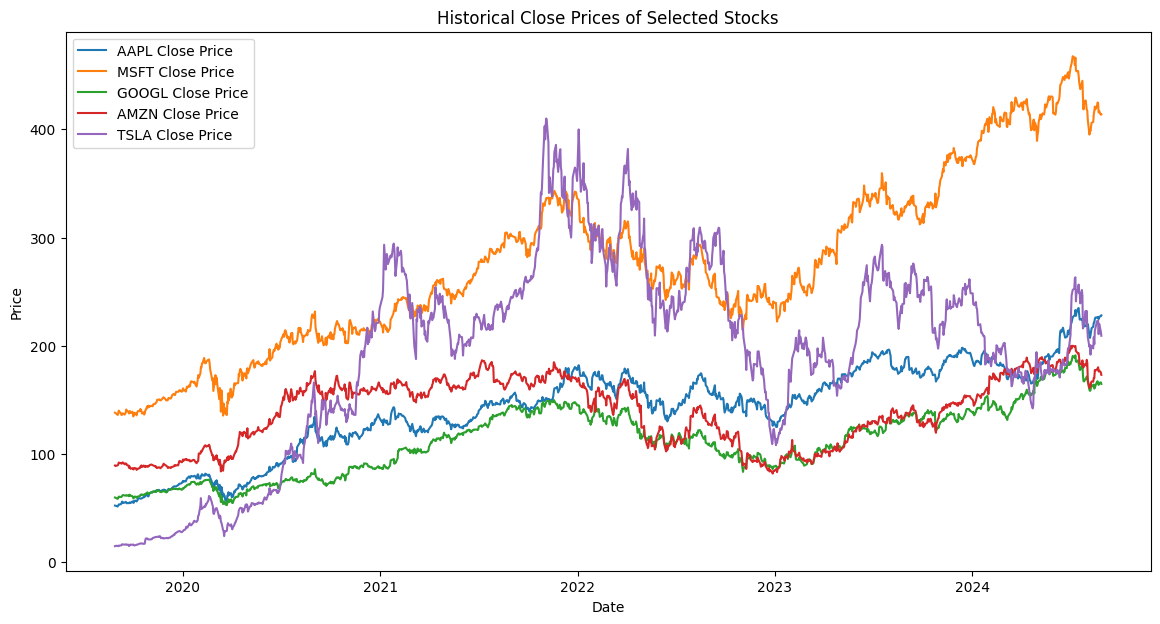

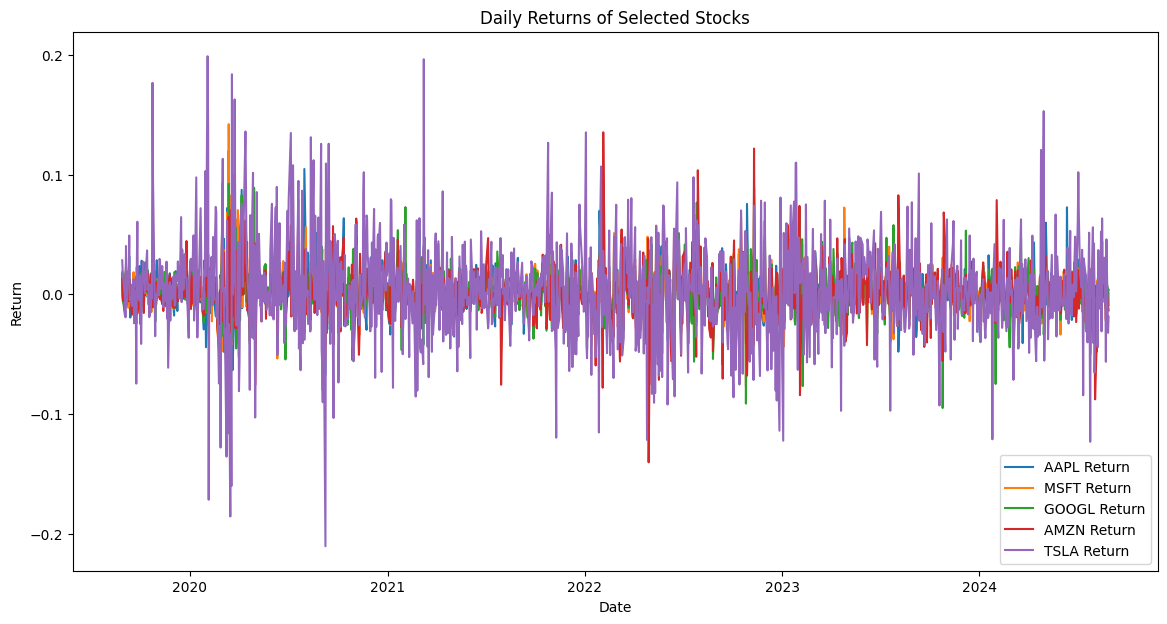

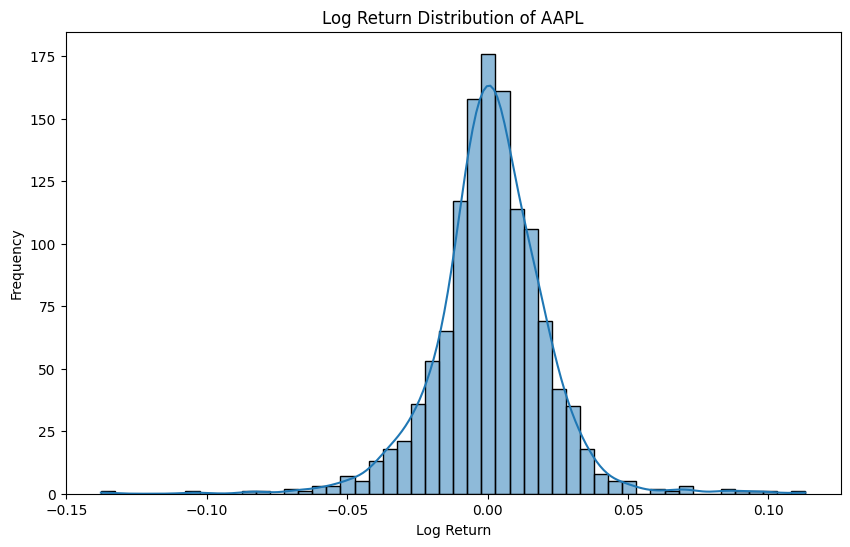

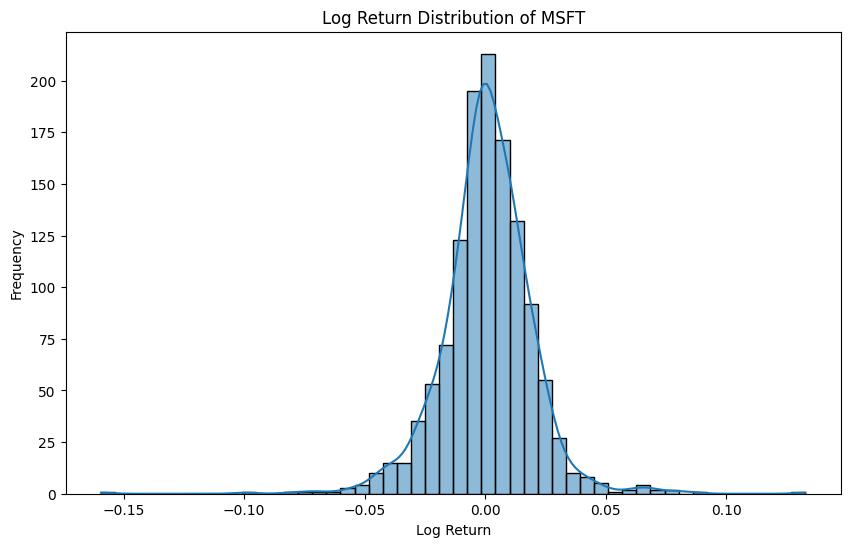

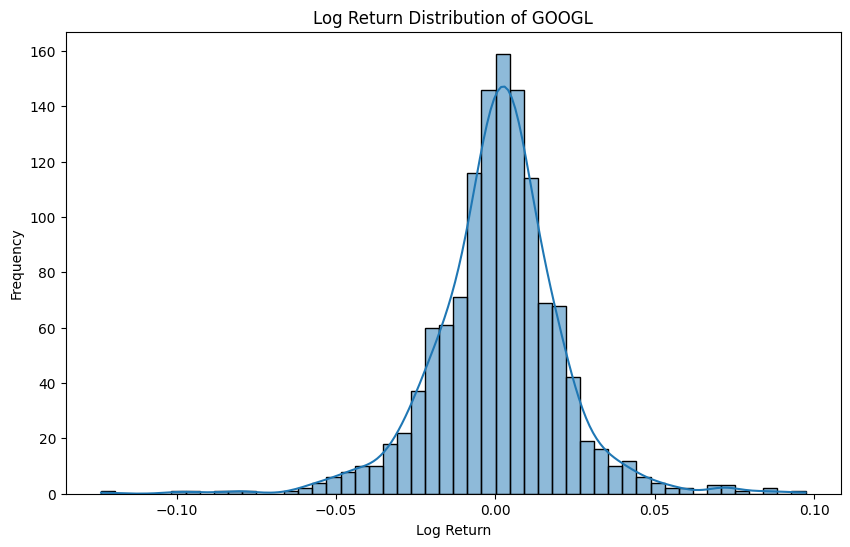

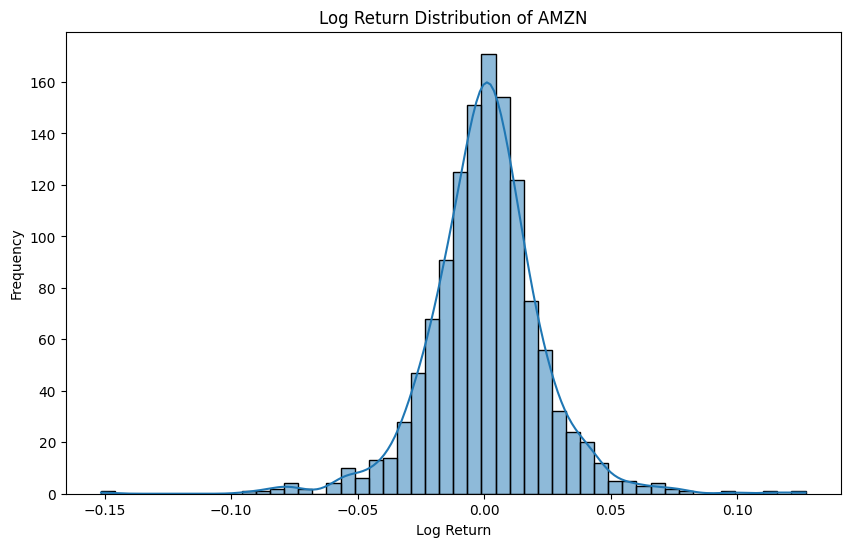

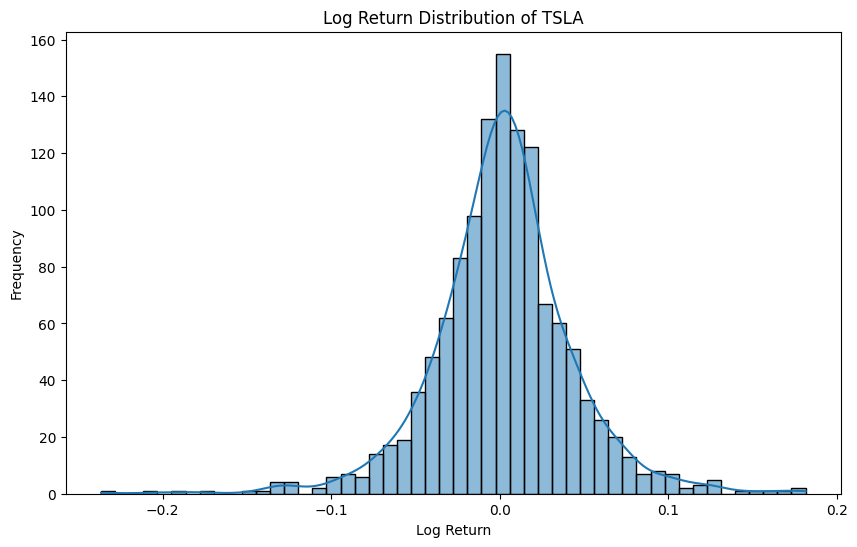

Statistics for AAPL:
  Mean Return: 0.0014
  Volatility: 0.0200
  Mean Log Return: 0.0012
  Log Volatility: 0.0200
  Annualized Volatility: 0.3170
Statistics for MSFT:
  Mean Return: 0.0011
  Volatility: 0.0191
  Mean Log Return: 0.0009
  Log Volatility: 0.0191
  Annualized Volatility: 0.3030
Statistics for GOOGL:
  Mean Return: 0.0010
  Volatility: 0.0201
  Mean Log Return: 0.0008
  Log Volatility: 0.0201
  Annualized Volatility: 0.3193
Statistics for AMZN:
  Mean Return: 0.0008
  Volatility: 0.0223
  Mean Log Return: 0.0005
  Log Volatility: 0.0223
  Annualized Volatility: 0.3542
Statistics for TSLA:
  Mean Return: 0.0030
  Volatility: 0.0414
  Mean Log Return: 0.0021
  Log Volatility: 0.0413
  Annualized Volatility: 0.6570


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


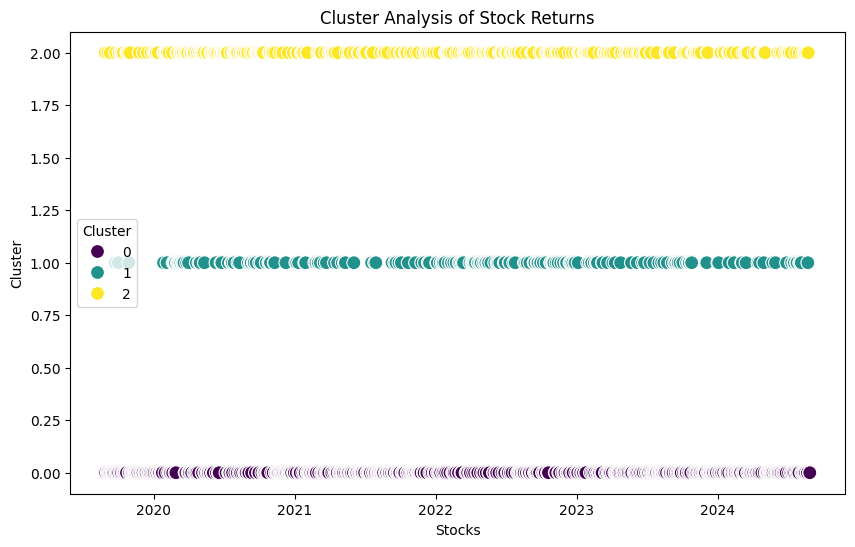

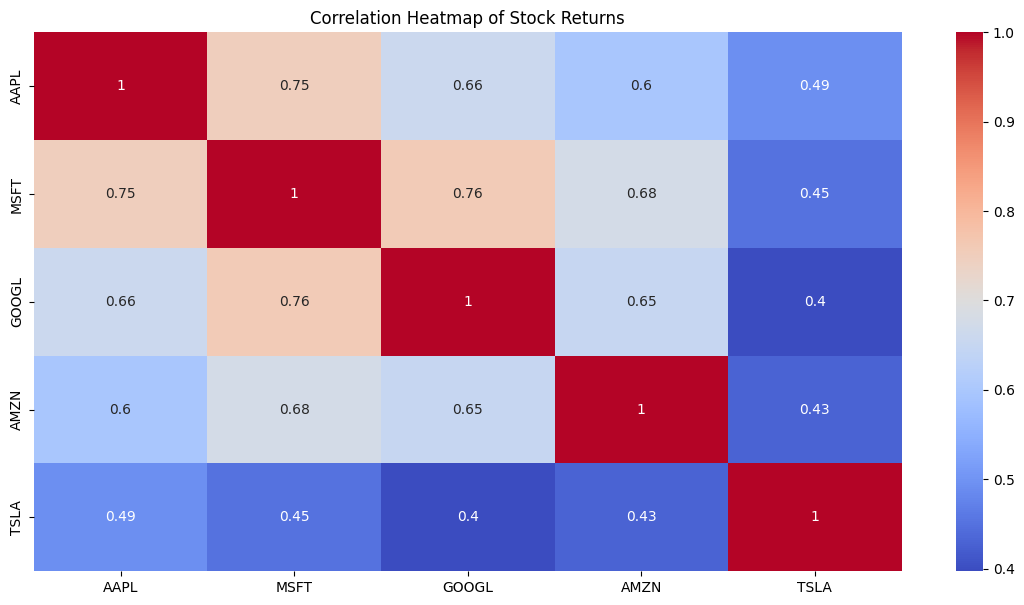

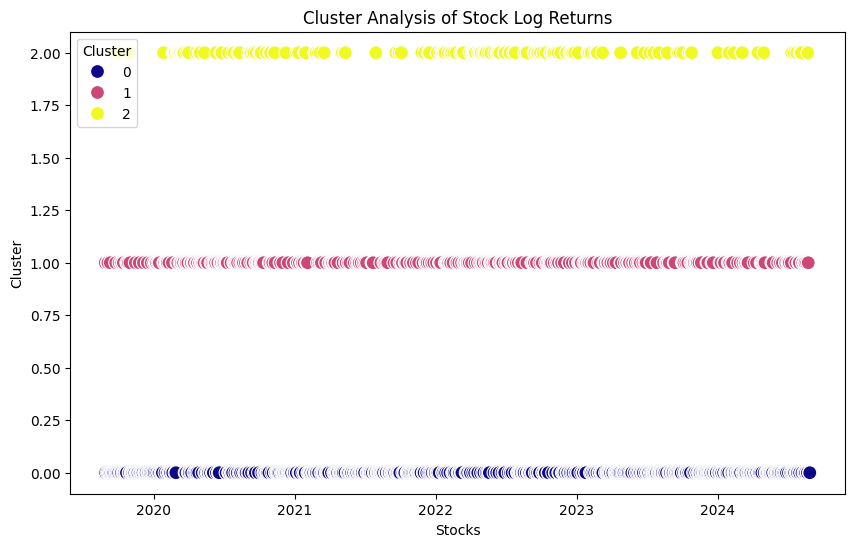

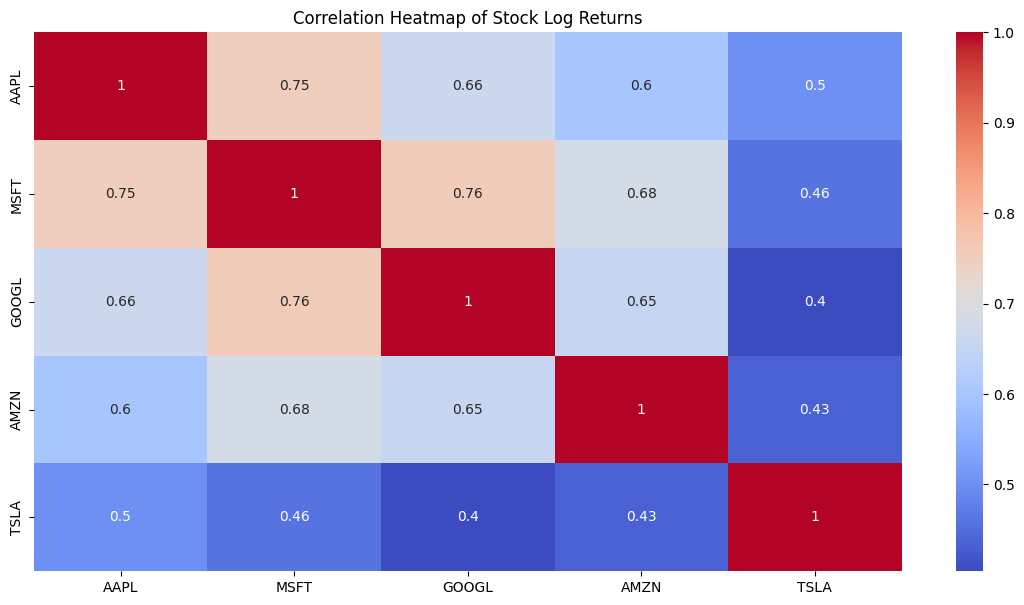

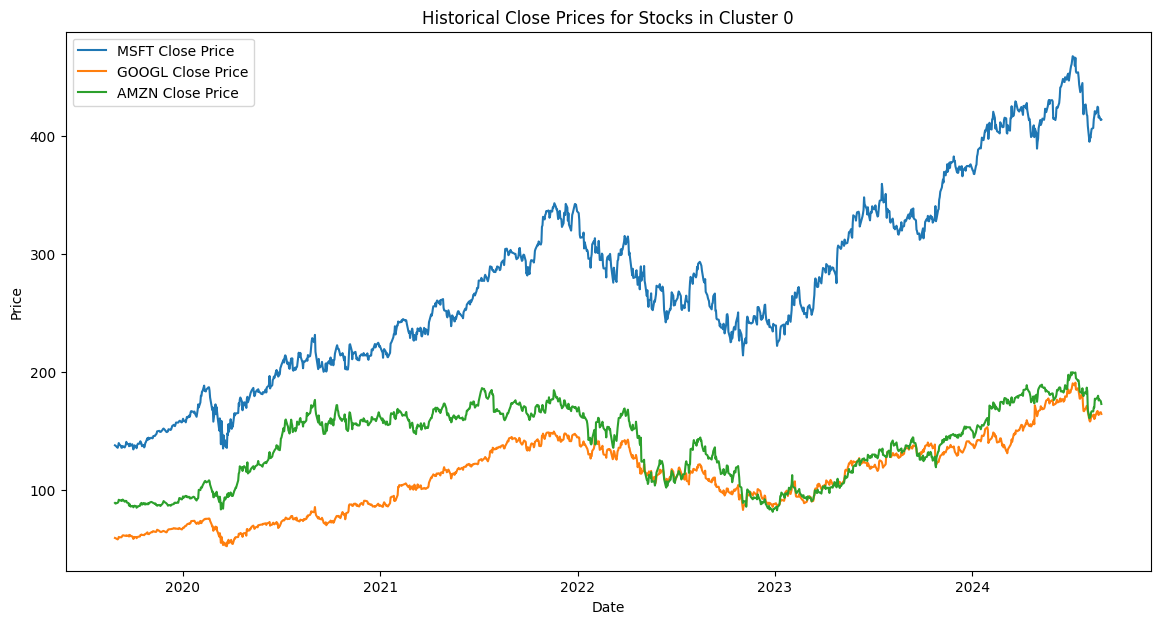

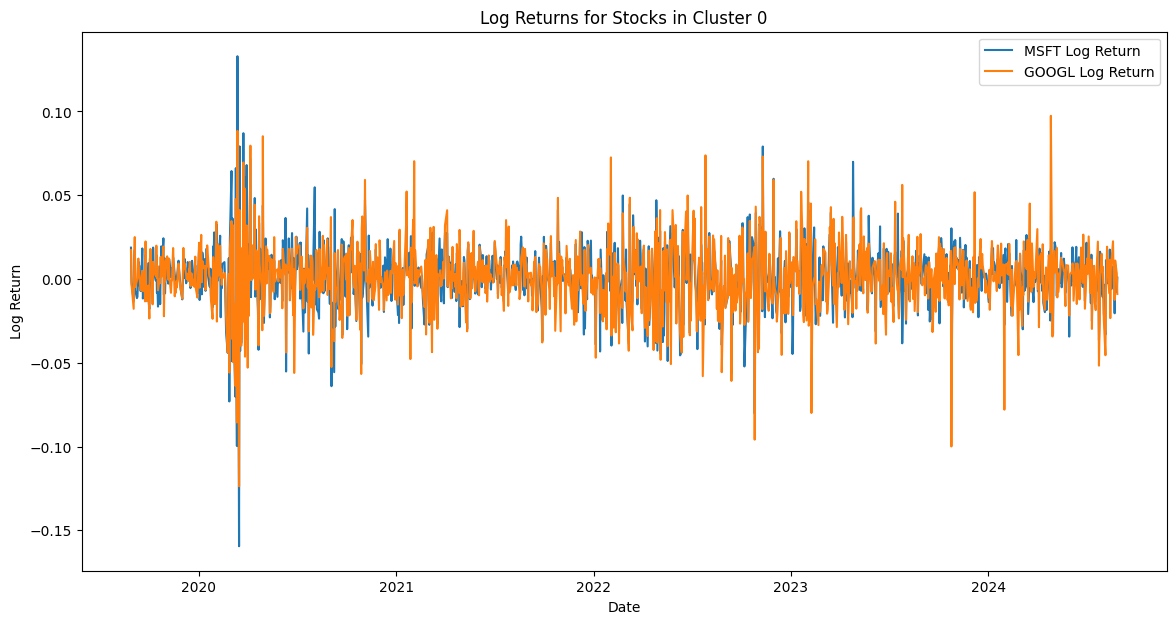

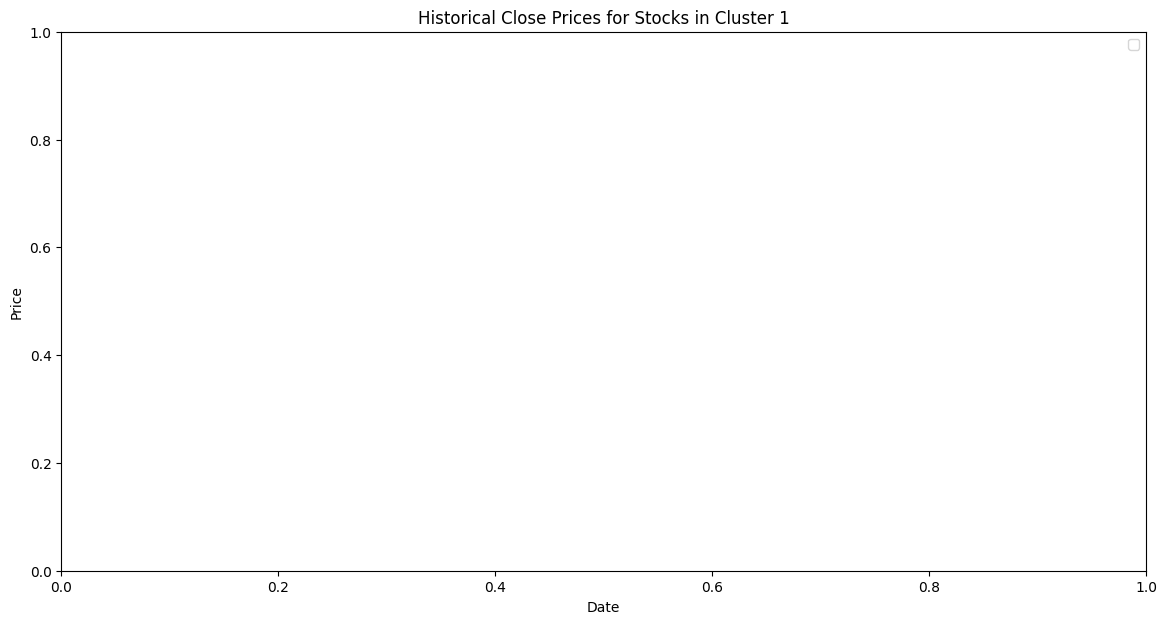

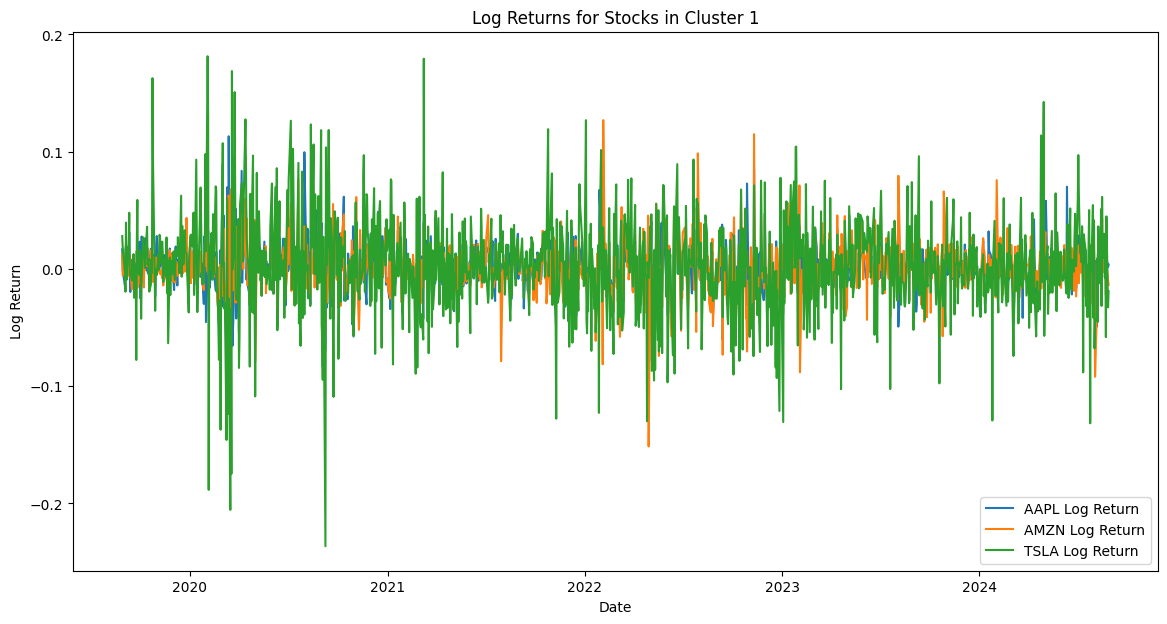

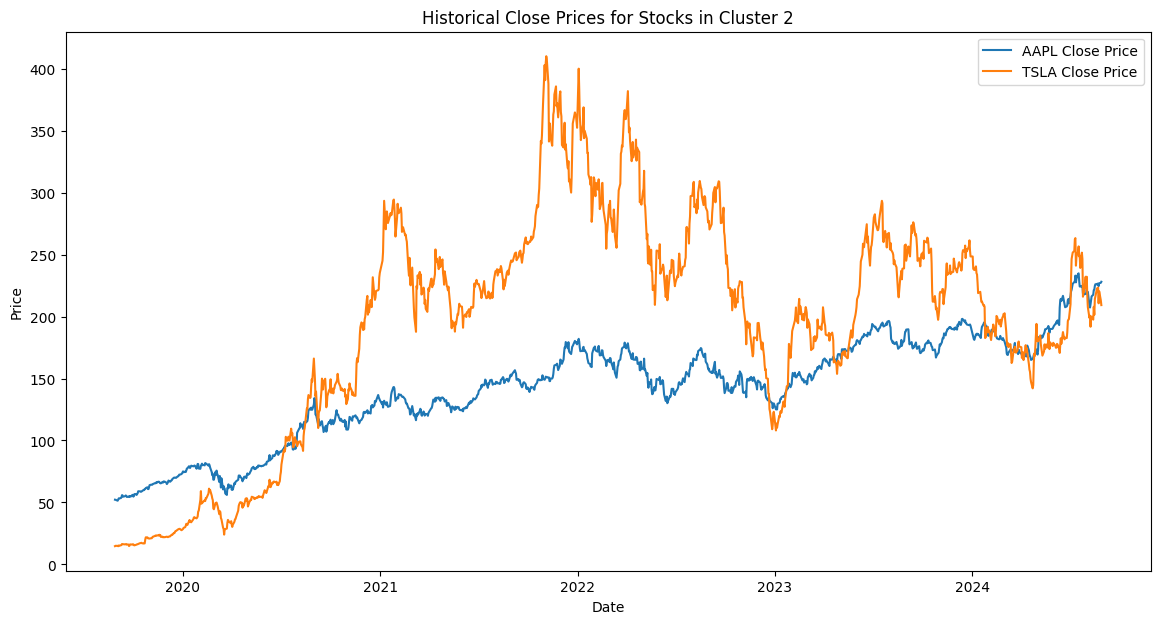

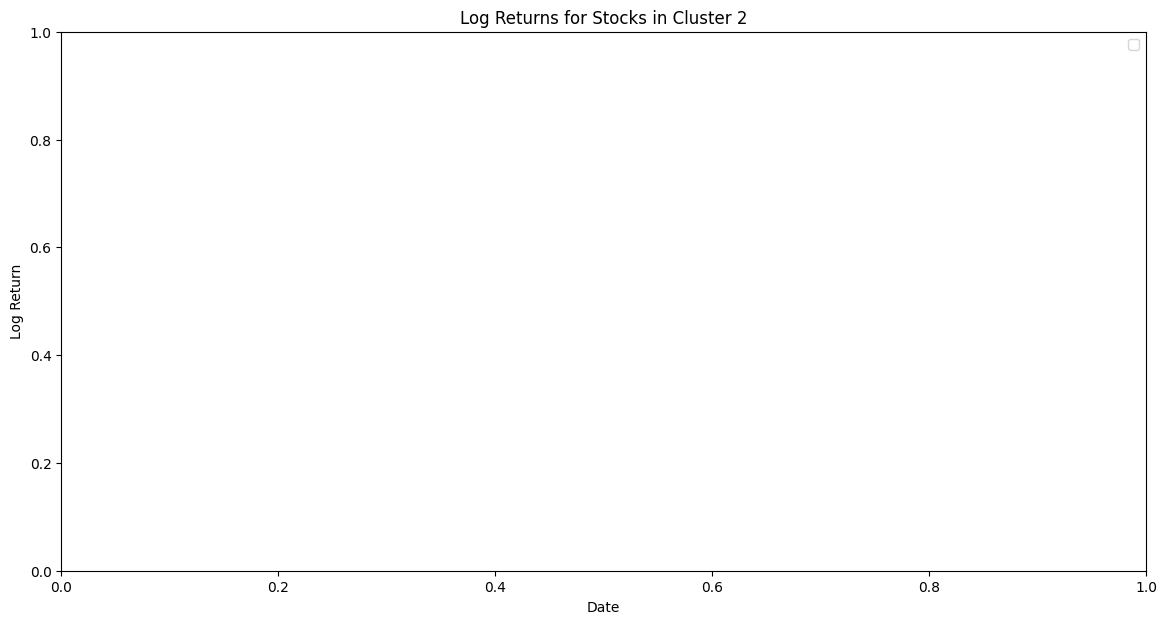

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Step 1: Fetch and preprocess data for multiple stocks
def fetch_data(tickers, period="5y", interval="1d"):
    stock_data = {}
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        stock_data[ticker] = yf.download(ticker, period=period, interval=interval)
    return stock_data

def preprocess_data(stock_data):
    for ticker in stock_data:
        print(f"Preprocessing data for {ticker}...")
        stock_data[ticker] = stock_data[ticker].dropna()
        stock_data[ticker]['Return'] = stock_data[ticker]['Close'].pct_change()
        stock_data[ticker]['Log_Return'] = np.log(stock_data[ticker]['Close'] / stock_data[ticker]['Close'].shift(1))
        stock_data[ticker] = stock_data[ticker].dropna()
    return stock_data

# Step 2: Visualize the data
def visualize_data(stock_data):
    plt.figure(figsize=(14, 7))
    for ticker in stock_data:
        plt.plot(stock_data[ticker]['Close'], label=f'{ticker} Close Price')
    plt.title('Historical Close Prices of Selected Stocks')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot each stock's returns
    plt.figure(figsize=(14, 7))
    for ticker in stock_data:
        plt.plot(stock_data[ticker]['Return'], label=f'{ticker} Return')
    plt.title('Daily Returns of Selected Stocks')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

    # Plot histograms of log returns
    for ticker in stock_data:
        plt.figure(figsize=(10, 6))
        sns.histplot(stock_data[ticker]['Log_Return'], bins=50, kde=True)
        plt.title(f'Log Return Distribution of {ticker}')
        plt.xlabel('Log Return')
        plt.ylabel('Frequency')
        plt.show()

# Step 3: Calculate additional statistics
def calculate_statistics(stock_data):
    stats = {}
    for ticker in stock_data:
        stats[ticker] = {
            'Mean Return': stock_data[ticker]['Return'].mean(),
            'Volatility': stock_data[ticker]['Return'].std(),
            'Mean Log Return': stock_data[ticker]['Log_Return'].mean(),
            'Log Volatility': stock_data[ticker]['Log_Return'].std(),
            'Annualized Volatility': stock_data[ticker]['Return'].std() * np.sqrt(252)
        }
        print(f"Statistics for {ticker}:")
        for key, value in stats[ticker].items():
            print(f"  {key}: {value:.4f}")
    return stats

# Step 4: Cluster Analysis for grouping similar performance stocks
def cluster_analysis(stock_data, n_clusters=3):
    returns = pd.DataFrame({ticker: stock_data[ticker]['Return'] for ticker in stock_data})
    log_returns = pd.DataFrame({ticker: stock_data[ticker]['Log_Return'] for ticker in stock_data})

    # Scaling both regular and log returns
    scaler = StandardScaler()
    returns_scaled = scaler.fit_transform(returns)
    log_returns_scaled = scaler.fit_transform(log_returns)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(returns_scaled)
    log_clusters = kmeans.fit_predict(log_returns_scaled)

    returns['Cluster'] = clusters
    log_returns['Cluster'] = log_clusters

    # Add cluster info to each stock's data for visualization
    for i, ticker in enumerate(stock_data):
        stock_data[ticker]['Cluster'] = clusters[i]
        stock_data[ticker]['Log_Cluster'] = log_clusters[i]

    return returns, log_returns

# Step 5: Visualize the clustered stocks
def visualize_clusters(returns, log_returns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=returns.index, y=returns['Cluster'], hue=returns['Cluster'], palette='viridis', s=100)
    plt.title('Cluster Analysis of Stock Returns')
    plt.xlabel('Stocks')
    plt.ylabel('Cluster')
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.heatmap(returns.drop(columns='Cluster').corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Stock Returns')
    plt.show()

    # Visualizing log return clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=log_returns.index, y=log_returns['Cluster'], hue=log_returns['Cluster'], palette='plasma', s=100)
    plt.title('Cluster Analysis of Stock Log Returns')
    plt.xlabel('Stocks')
    plt.ylabel('Cluster')
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.heatmap(log_returns.drop(columns='Cluster').corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Stock Log Returns')
    plt.show()

# Step 6: Plot cluster comparison
def compare_clusters(stock_data, n_clusters=3):
    for cluster in range(n_clusters):
        plt.figure(figsize=(14, 7))
        for ticker in stock_data:
            if stock_data[ticker]['Cluster'].iloc[0] == cluster:
                plt.plot(stock_data[ticker]['Close'], label=f'{ticker} Close Price')
        plt.title(f'Historical Close Prices for Stocks in Cluster {cluster}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

        plt.figure(figsize=(14, 7))
        for ticker in stock_data:
            if stock_data[ticker]['Log_Cluster'].iloc[0] == cluster:
                plt.plot(stock_data[ticker]['Log_Return'], label=f'{ticker} Log Return')
        plt.title(f'Log Returns for Stocks in Cluster {cluster}')
        plt.xlabel('Date')
        plt.ylabel('Log Return')
        plt.legend()
        plt.show()

# Example usage:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # List of 5 stocks
stock_data = fetch_data(tickers, period="5y", interval="1d")
stock_data = preprocess_data(stock_data)

visualize_data(stock_data)

stats = calculate_statistics(stock_data)

returns, log_returns = cluster_analysis(stock_data, n_clusters=3)

visualize_clusters(returns, log_returns)

compare_clusters(stock_data, n_clusters=3)
